# Transformer Metrics

## Imports

In [1]:
# Add Utils to path
import sys
sys.path.append('../Utils')  # Adds higher directory to python modules path.
from plots import plot_image_vs_prediction

# COCO
import json
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval

# Metrics
import pandas as pd
import matplotlib.pyplot as plt

## Model 1
Transformer | Clahe for training | 100 epochs | 1200 minutes of training | NVIDIA 3050 Laptop GPU

In [2]:
# Paths
test_path = '../ExDark_COCO/test_set.json'
results_path = '../Models/Transformer/lightning_logs/clahe/output/results.json'
model_path = "../Models/Transformer/lightning_logs/clahe/output"

# Ground truth
cocoGt = COCO(test_path)

# Predictions
results_set = json.load(open(results_path, 'r'))
cocoDt = cocoGt.loadRes(results_set['annotations'])

# Initialize COCOEval with ground truth, predictions, and evaluation type
cocoEval = COCOeval(cocoGt, cocoDt, 'bbox')

# Evaluate, accumulate, and summarize
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.01s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=1.41s).
Accumulating evaluation results...
DONE (t=0.28s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.314
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.579
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.292
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.188
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.334
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.495
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.501
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDet

In [3]:
# Print results
print('Mean Average Precission (mAP) IoU:', cocoEval.stats[0])
print('Mean Average Recall (mAR):', cocoEval.stats[6])

Mean Average Precission (mAP) IoU: 0.3141405122243248
Mean Average Recall (mAR): 0.4951661754249141


In [4]:
# Metrics during training
df = pd.read_csv(model_path + '/metrics.csv')
df

,train_loss_ce,train_loss_bbox,training_loss,train_cardinality_error,step,train_loss_giou,epoch,validation_loss_giou,validation_loss_ce,validation/loss,validation_loss_bbox,validation_cardinality_error
0,2.559887,0.130735,3.913735,96.75,4,0.350086,0,NaN,NaN,NaN,NaN,NaN
1,2.091624,0.065903,3.134146,39.00,9,0.356504,0,NaN,NaN,NaN,NaN,NaN
2,1.564784,0.059687,2.357674,4.00,14,0.247227,0,NaN,NaN,NaN,NaN,NaN
3,0.966349,0.116493,2.090388,2.00,19,0.270786,0,NaN,NaN,NaN,NaN,NaN
4,0.969561,0.144161,2.219879,2.75,24,0.264758,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1975,0.009150,0.020082,0.207511,0.00,9384,0.048975,99,NaN,NaN,NaN,NaN,NaN
1976,0.078638,0.024814,0.442875,0.00,9389,0.120082,99,NaN,NaN,NaN,NaN,NaN
1977,0.041864,0.032153,0.544566,1.75,9394,0.170968,99,NaN,NaN,NaN,NaN,NaN
1978,0.058178,0.018377,0.449748,1.25,9399,0.149843,99,NaN,NaN,NaN,NaN,NaN


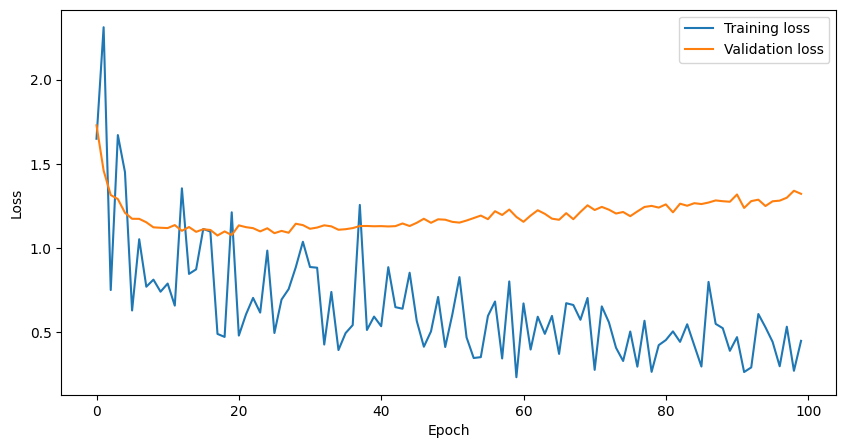

In [5]:
# Training loss
df_train = df[['epoch', 'training_loss']]
df_train = df_train[df_train['training_loss'].notna()]
df_train = df_train.groupby('epoch').tail(1)

# Validation loss
df_val = df[['epoch', 'validation/loss']]
df_val = df_val[df_val['validation/loss'].notna()]
df_val = df_val.groupby('epoch').tail(1)

# Plot Loss Evolution
plt.figure(figsize=(10, 5))
plt.plot(df_train['epoch'], df_train['training_loss'], label='Training loss')
plt.plot(df_val['epoch'], df_val['validation/loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


loading annotations into memory...
Done (t=0.02s)
creating index...
index created!

Ground Truth Annotations: 
Label:  Bicycle Box:  [0.2557, 0.7493, 0.1229, 0.1814]
Label:  Bicycle Box:  [0.3879, 0.6729, 0.0214, 0.0571]
Label:  Bicycle Box:  [0.5021, 0.6571, 0.0214, 0.0514]
Label:  Motorbike Box:  [0.715, 0.6564, 0.0443, 0.0643]
Label:  People Box:  [0.3607, 0.6479, 0.0243, 0.1071]
Label:  People Box:  [0.3914, 0.6579, 0.0286, 0.0814]
Label:  People Box:  [0.5364, 0.6429, 0.0214, 0.0543]
Label:  People Box:  [0.5036, 0.6407, 0.0186, 0.0643]
Label:  People Box:  [0.5871, 0.6429, 0.0229, 0.06]
Label:  People Box:  [0.2479, 0.675, 0.09, 0.2386]

Predicted Annotations: 
Label:  Bicycle Box:  [127.51374816894531, 455.8111267089844, 215.26673889160156, 583.587158203125] Score:  0.99479
Label:  People Box:  [237.05662536621094, 419.2055969238281, 258.39990234375, 497.12493896484375] Score:  0.9101
Label:  People Box:  [280.84552001953125, 428.9881286621094, 298.4481506347656, 469.55871582031

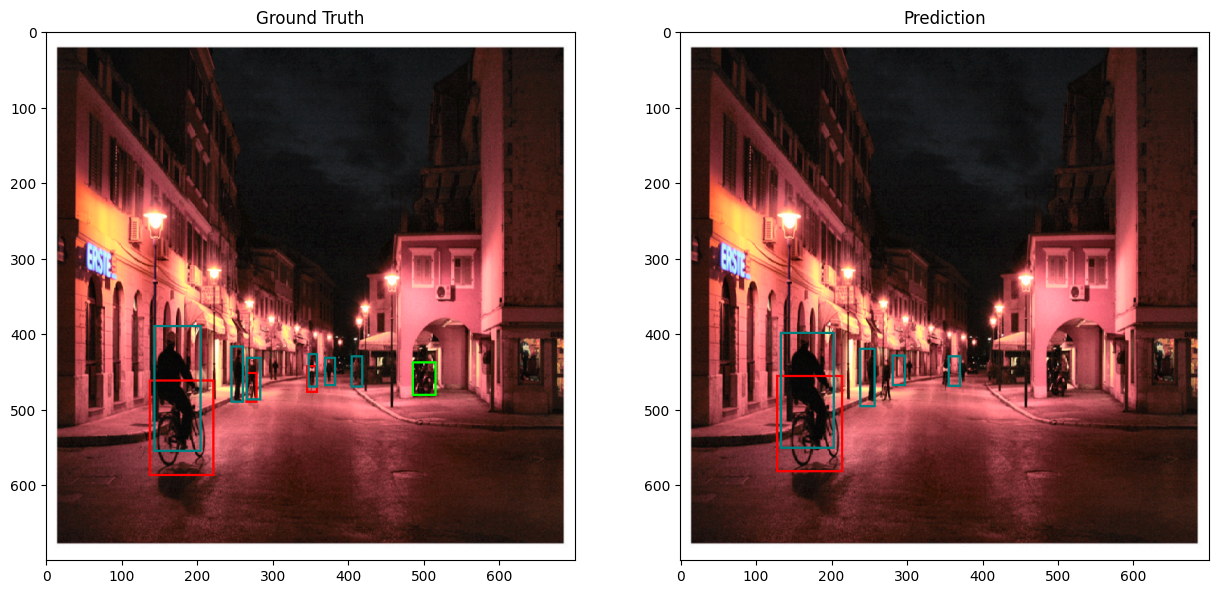

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!

Ground Truth Annotations: 
Label:  Bus Box:  [0.4529, 0.4729, 0.5771, 0.7657]
Label:  People Box:  [0.0436, 0.5029, 0.0643, 0.1943]
Label:  People Box:  [0.0864, 0.4893, 0.05, 0.19]

Predicted Annotations: 
Label:  People Box:  [3.7847917079925537, 295.2401123046875, 43.99480056762695, 420.3115539550781] Score:  0.99294
Label:  People Box:  [33.83568572998047, 290.8769836425781, 74.72789001464844, 415.4048767089844] Score:  0.98078
Label:  People Box:  [68.59220123291016, 299.203125, 125.18023681640625, 462.9744567871094] Score:  0.98584
Label:  Bus Box:  [116.50627899169922, 76.78069305419922, 500.9381103515625, 595.945556640625] Score:  0.9987


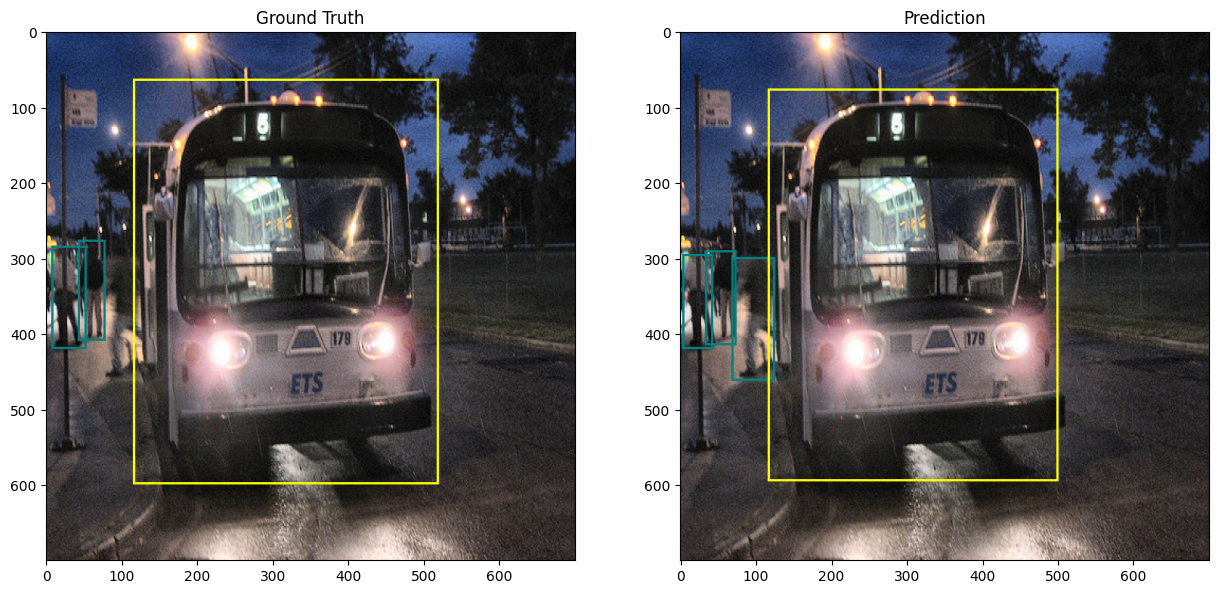

loading annotations into memory...
Done (t=0.02s)
creating index...
index created!

Ground Truth Annotations: 
Label:  Dog Box:  [0.36, 0.6607, 0.4629, 0.63]
Label:  Chair Box:  [0.2214, 0.3707, 0.2057, 0.4586]

Predicted Annotations: 
Label:  Dog Box:  [65.4174575805664, 223.99119567871094, 402.071533203125, 687.9335327148438] Score:  0.99779


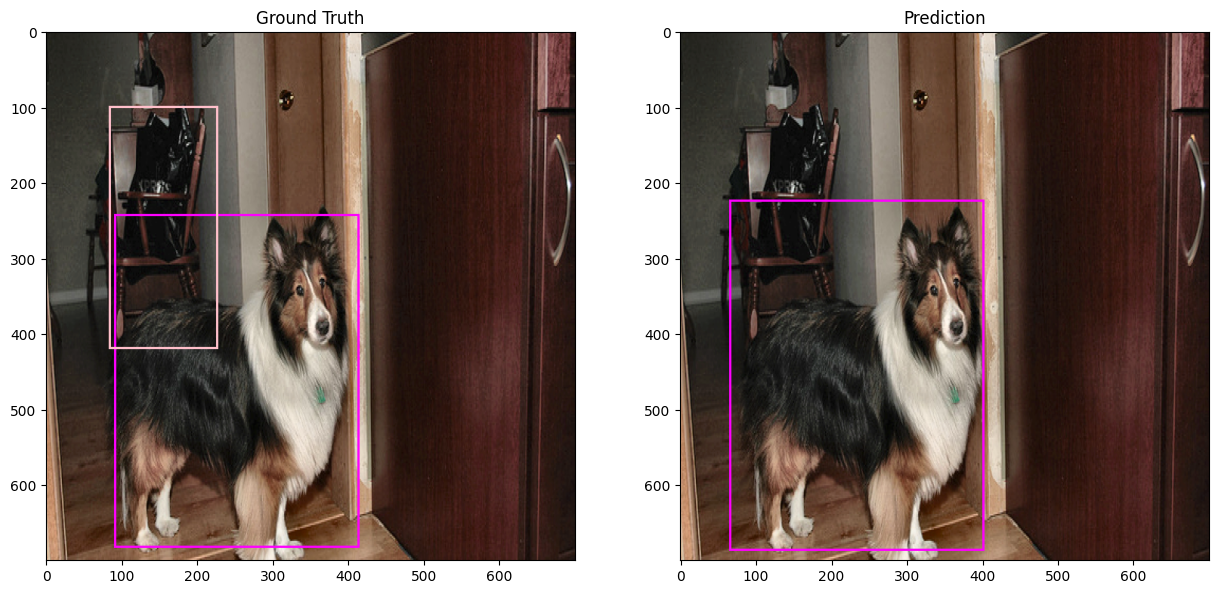

loading annotations into memory...
Done (t=0.01s)
creating index...
index created!

Ground Truth Annotations: 
Label:  Chair Box:  [0.6686, 0.7493, 0.3943, 0.4757]
Label:  People Box:  [0.3621, 0.5279, 0.35, 0.9014]

Predicted Annotations: 
Label:  Chair Box:  [297.56591796875, 353.9699401855469, 598.9779663085938, 690.638671875] Score:  0.99469
Label:  People Box:  [120.5134506225586, 51.44084548950195, 390.64447021484375, 689.788330078125] Score:  0.99889


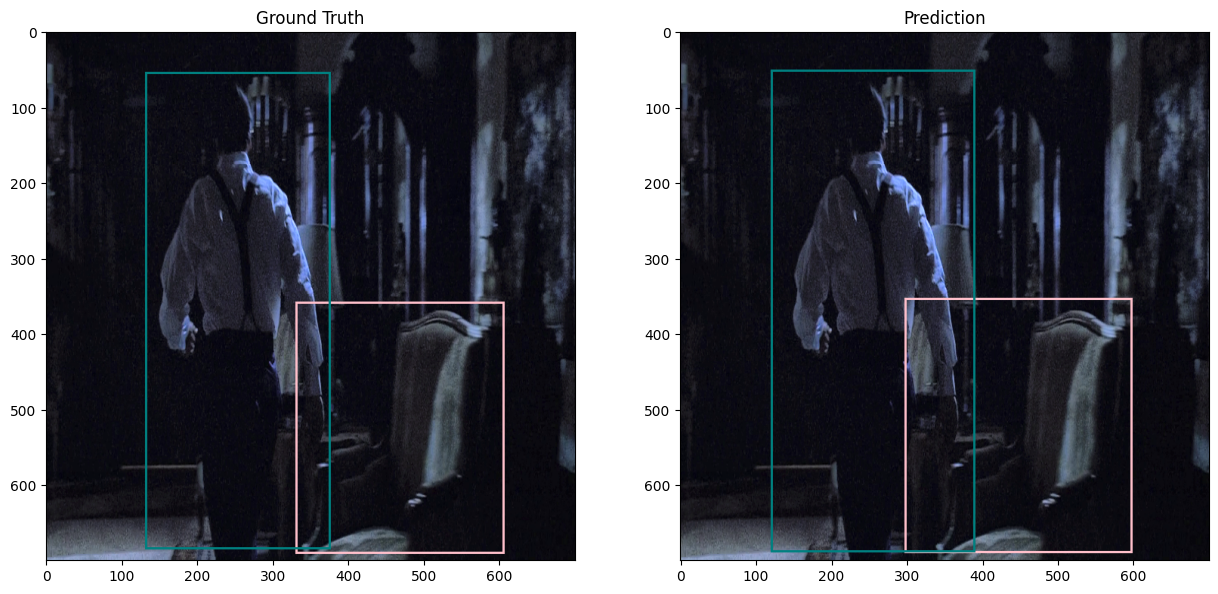

In [6]:
# PLots
image_ids = [200, 750, 1500, 1600]
width = 3
for image_id in image_ids:
    plot_image_vs_prediction(image_id=image_id, test_path=test_path, model_path=model_path, width=width)

## Model 2
Transformer | Color Balance Adjustement for training | 100 epochs | ??? minutes of training | NVIDIA 3070 Laptop GPU

In [7]:
# TODO